In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import tensorflow as tf
import rasterio
from rasterio.plot import show
import PIL

(1, 24, 24)


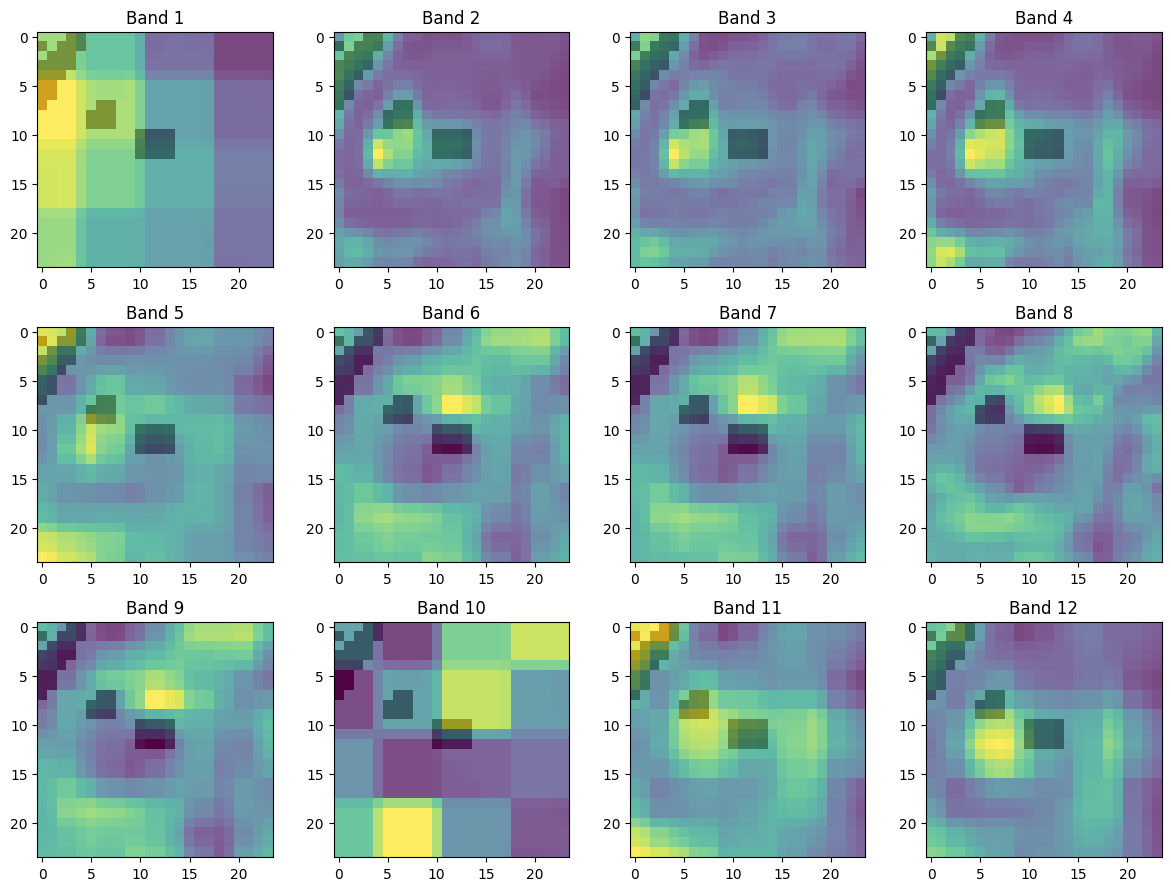

In [162]:
# Define the path to your TIFF file
tiff_path = 'D:/Coding/DataScience/OSPD using S-2 competition/data/train/s2_image/train_s2_image_3.tif'
mask_path = 'D:/Coding/DataScience/OSPD using S-2 competition/data/train/mask/train_mask_3.tif'
# Open the TIFF file
with rasterio.open(tiff_path) as src:
    # Read all 12 bands
    bands = src.read()

#Open mask
with rasterio.open(mask_path) as src:
    mask = src.read()
    print(mask.shape)

# Display each band as a grayscale image
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
for i, ax in enumerate(axes.flat):
    if i < 12:
        show(bands[i], interpolation='none', ax=ax, contour=False)
        #show(bands[i], cmap='Reds', interpolation='none', ax=ax, contour=True)
        show(mask[0], cmap='Reds', interpolation='none', ax=ax, contour=False, alpha=0.3)

        
        ax.set_title(f'Band {i + 1}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [163]:
def normalize_to_255(data):
    min_val = 10000
    max_val = 0
    for x in data:
        min_val = min(min_val, x.min())
        max_val = max(max_val, x.max())

    normalized_data = [x/max_val for x in data]

    return normalized_data

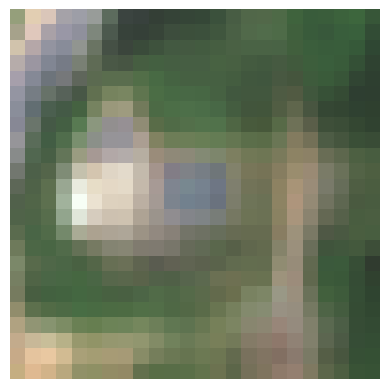

In [164]:
# Open the TIFF file
with rasterio.open(tiff_path) as src:
    red_band = src.read(4)
    green_band = src.read(3)
    blue_band = src.read(2)

    # Stack the bands to create an RGB image
    rgb_image = np.array([[[red, green, blue] for red, green, blue in zip(red_band[i], green_band[i], blue_band[i])] for i in range(len(red_band))])

    with rasterio.open(mask_path) as src:
        mask = src.read()


    # Display the RGB image
    plt.imshow(normalize_to_255(rgb_image))
    plt.imshow(mask[0], cmap='Blues', interpolation='none', alpha=0.1)

    plt.axis('off')
    plt.show()



In [165]:
def display_image(image, mask_path=None, title=''):
    fig = plt.figure(figsize=(10, 10))
    with rasterio.open(image) as src:
        red_band = src.read(4)
        green_band = src.read(3)
        blue_band = src.read(2)

        # Stack the bands to create an RGB image
        rgb_image = np.array([[[red, green, blue] for red, green, blue in zip(red_band[i], green_band[i], blue_band[i])] for i in range(len(red_band))])
        if mask_path is not None:
            with rasterio.open(mask_path) as src:
                mask = src.read()


        # Display the RGB image
        plt.imshow(normalize_to_255(rgb_image))
        if mask_path is not None:
            plt.imshow(mask[0], cmap="Reds",alpha=0.3)

    plt.title(title)
    plt.axis('off')
    plt.show()

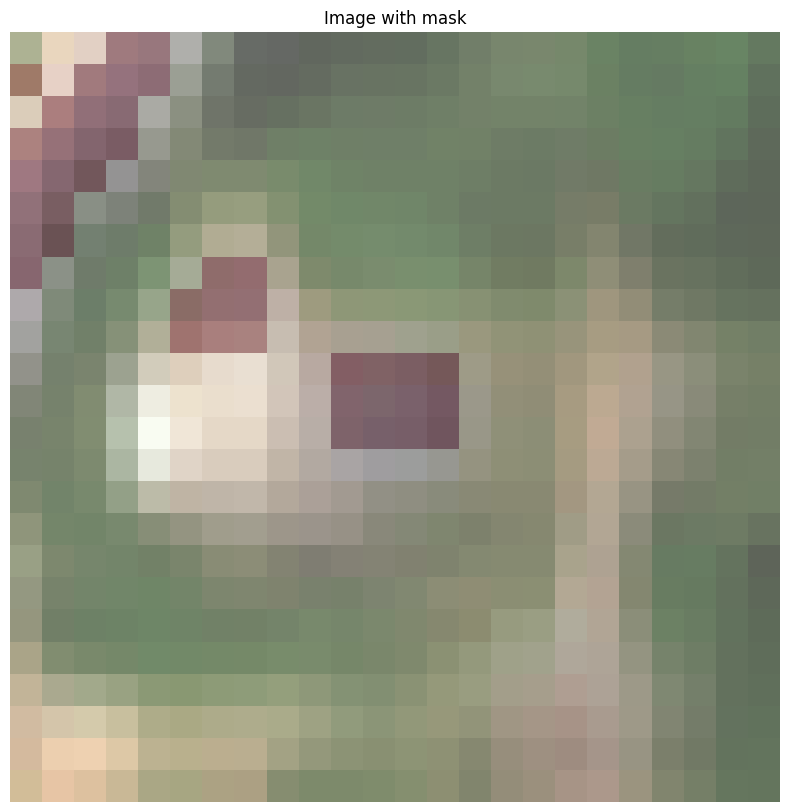

In [166]:
display_image(tiff_path, mask_path=mask_path, title='Image with mask')

In [58]:
#open file with rasterio
def read_s2_image(path):
    with rasterio.open(path) as src:
        return src.read()

In [59]:
#read images from folder
def read_s2_images(folder, limit=None):
    images = []
    for file in os.listdir(folder):
        if file.endswith(".tif"):
            images.append(read_s2_image(os.path.join(folder, file)))
            if limit is not None and len(images) >= limit:
                break
    return images

In [81]:
#normalize images
def normalize_s2_images(images):
    imgs = []

    for img in images:
        imgs.append(img / 255.0)
    return imgs